# Simple autoencoder

In [1]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data(img_dir, ending):
    return np.array([cv2.imread(os.path.join(img_dir, img)) for img in os.listdir(img_dir) if img.endswith(ending)])


In [3]:
X_ORG = load_data("3Shapes2_large/", "im1.png")
X_ORG.shape

(8015, 128, 128, 3)

In [4]:
X = X_ORG[:1]
X = X/255-0.5

In [63]:
def create_graph():
    input_img = tf.placeholder(dtype=tf.float32, shape=[None,128,128,3], name="input")
    
    logits = tf.contrib.layers.flatten(input_img)
    
    w = tf.Variable(tf.random_normal([(128*128*3),(16*16*3)]))
    b = tf.Variable(tf.zeros((16*16*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    logits = tf.nn.relu(logits)
    
    w = tf.Variable(tf.random_normal([(16*16*3),(8*4*3)]))
    b = tf.Variable(tf.zeros((8*4*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    logits = tf.nn.relu(logits)
    
    ## Do the sampling
    # get mean and log_variance
    mean = tf.slice(logits, begin=[0, 0], size=[1, int(8*4*3/2)])
    mean = tf.Print(mean, [mean], "mean:")
    stddev = tf.slice(logits, begin=[0, int(8*4*3/2)], size=[1, int(8*4*3/2)])
    
    # do sampling
    logits = tf.random_normal(shape=[1, 4*4*3], mean=mean, stddev=stddev)
    logits = tf.Print(logits, [logits])
                                      
    #uncompressing
                                      
    w = tf.Variable(tf.random_normal([(4*4*3),(16*16*3)]))
    b = tf.Variable(tf.zeros((16*16*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    logits = tf.nn.relu(logits)
                                      
    w = tf.Variable(tf.random_normal([(16*16*3),(128*128*3)]))
    b = tf.Variable(tf.zeros((128*128*3)))
    logits = tf.add(tf.matmul(logits,w),b)
    
    logits = tf.reshape(logits, [-1, 128,128,3])
    
    return input_img, logits

In [64]:
def train_fn(x,y):
    loss = tf.reduce_mean(tf.square(x-y))
    optimizer = tf.train.AdamOptimizer(0.01)
    train = optimizer.minimize(loss)
    
    return loss, train

In [65]:
def run(x_train, epochs, num_batches):
    
    org_input, output = create_graph()
    loss, train = train_fn(org_input, output)
    
    with tf.Session() as sess:    
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(epochs):
            print("\nEpoch %i/%i:" % (epoch+1, epochs))
            
            _, batch_loss = sess.run([train, loss], feed_dict={org_input:x_train})
            
            print("\tloss:", batch_loss)
        
        test = output.eval(feed_dict={org_input:X})
        fig, axs = plt.subplots(2)
        axs[0].imshow(X[0])
        axs[1].imshow(test[0])


Epoch 1/20:
	loss: 8.78105e+10

Epoch 2/20:
	loss: 1.3022e+11

Epoch 3/20:
	loss: 6.41204e+10

Epoch 4/20:
	loss: 2.00434e+10

Epoch 5/20:
	loss: 1.24868e+10

Epoch 6/20:
	loss: 1.14184e+10

Epoch 7/20:
	loss: 1.73041e+09

Epoch 8/20:
	loss: 1.69686e+09

Epoch 9/20:
	loss: 4.57706e+09

Epoch 10/20:
	loss: 9.5818e+08

Epoch 11/20:
	loss: 4.68314e+09

Epoch 12/20:
	loss: 3.73317e+09

Epoch 13/20:
	loss: 4.5992e+07

Epoch 14/20:
	loss: 6.35573e+06

Epoch 15/20:
	loss: 1.93561e+06

Epoch 16/20:
	loss: 0.140793

Epoch 17/20:
	loss: 1063.87

Epoch 18/20:
	loss: 642442.0

Epoch 19/20:
	loss: 5.79815e+06

Epoch 20/20:
	loss: 0.141702


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


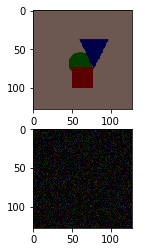

In [66]:
run(X,20,1)